<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_07_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mnist를 사용해 십진분류기 만들기



In [91]:
# 모듈 불러오기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [92]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


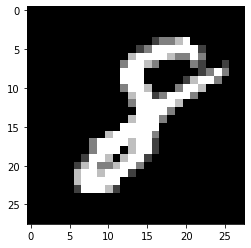

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 128
  128 191 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 128 255 255
  255 255 255 255  64   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255 255 255
  191 128 128 255 128   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 128 255 255 191 128   0
    0   0   0 128  64   0   0  64   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 

In [93]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

#28x28개의 픽셀인데 값이 있는 데이터만 밝기로 표현한 것

In [94]:
#원본데이터와 달리쓰기위해 소문자로 바꾼다  <대문자 = 이미지, 소문자 = 딥러닝에 사용>
#라벨을 원핫인코딩으로 바꿔주는 것이 to_categorical
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [95]:
#원핫인코딩 확인하기, 모델에 사용하기 위해서 픽셀값들을 원핫인코딩으로 바꿈

print(Y_train[11])
print(y_train[11])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [96]:
#reshape(-1, 28 * 28)  = 이미지데이터는 기존 데이터보다 차원이 커서 dense에 못 넣기 때문에 차원이 1차원이여야 해서 해주는 것

x_train = X_train.reshape(-1, 28 * 28)  # 28 * 28= 784
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255   #스케일링 작업 흑백 이미지 데이터는 픽셀 하나당 0-255까지의 숫자값을 가지므로 이를 255로 나누면 0-1 사이로 normalize된다(minmaxscaler 와 동일)
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [97]:
# 모델 레이어 설정
model = Sequential()
model.add(Dense(256, input_dim=784,
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  #숫자가 0~9라서 타겟수가 10개라서 10

In [98]:
# 컴파일설정

opt = Adam(lr=0.001)
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 305,034
Trainable params: 305,034
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [99]:
#모델 학습하기
fit_hist = model.fit(x_train, y_train,batch_size=500, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
96/96 [==============================] - 3s 24ms/step - loss: 0.4831 - accuracy: 0.8663 - val_loss: 0.1941 - val_accuracy: 0.9433
Epoch 2/10
96/96 [==============================] - 2s 22ms/step - loss: 0.1620 - accuracy: 0.9523 - val_loss: 0.1336 - val_accuracy: 0.9604
Epoch 3/10
96/96 [==============================] - 2s 21ms/step - loss: 0.1088 - accuracy: 0.9678 - val_loss: 0.1237 - val_accuracy: 0.9613
Epoch 4/10
96/96 [==============================] - 2s 21ms/step - loss: 0.0783 - accuracy: 0.9762 - val_loss: 0.1075 - val_accuracy: 0.9672
Epoch 5/10
96/96 [==============================] - 2s 21ms/step - loss: 0.0577 - accuracy: 0.9833 - val_loss: 0.0950 - val_accuracy: 0.9718
Epoch 6/10
96/96 [==============================] - 2s 22ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 7/10
96/96 [==============================] - 2s 21ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0975 - val_accuracy: 0.9725
Epoch 8/10
96

In [100]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.9751999974250793


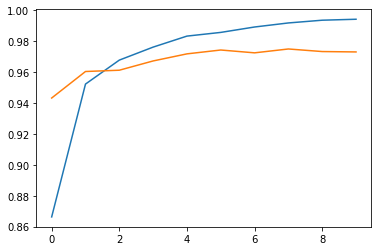

In [101]:
#plt으로 학습률 확인하기

plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])

8
[[6.6778023e-09 8.2259372e-10 5.5849245e-08 2.4723349e-06 7.1572914e-11
  3.0909342e-10 7.5413408e-12 8.4500718e-09 9.9999750e-01 4.4788823e-08]]
8


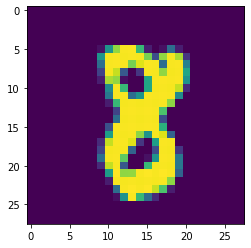

In [102]:
#정확률을 보기위해 임의의 그림을 주었을 때 숫자가 정확히 나오는 지 확인하기

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(np.argmax(pred))